<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/16_Ultra_Pro_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%7C_%D0%A3%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Ultra pro

Макс 10 баллов

Загрузите таблицу смс-спама по ссылке:

https://drive.google.com/file/d/1qzc4X5lfwpftVK5yaMdPb2xy7dK5jKs5/view?usp=sharing

Загрузить данные  в пандас, чтобы избежать ошибки, следует таким образом: pd.read_csv (open(path, errors = ‘replace’)), где path = директория до файла.

Загрузите базу смс-сообщений, разделенных по категориям спам и не спам.

Создайте обучающую, проверочную выборки. Создайте и обучите модель, определяющую тип сообщения. Классифицируйте каждое сообщение. Чтобы было легче, каждое сообщение переделайте в последовательность токенов,и ограничьте или добейте нулями до определённой длины - 15.

Возьмите 10 случайных примеров из всей базы, сделайте предсказание нейронкой и выведите результат в читаемом виде:

“текст сообщения” - “категория сообщения, определенная нейронкой”.

Постройте диаграмму частотности распределения слов(plt.stem()) в нормальных сообщениях и сообщениях со спамом.

#Загрузка данных

In [ ]:
from google.colab import files # Для работы с файлами 
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import matplotlib.pyplot as plt # Для вывода графиков
import os # Для работы с файлами
%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями

from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую
from google.colab import drive # Для работы с Google Drive
import time # Импортируем библиотеку time

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv (open('/content/drive/MyDrive/Colab Notebooks/Базы/psy.csv', errors = 'replace')) #, где path = директория до файла
df

,comment_id,author,date,content,class
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",True
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,True
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,True
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,True
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,True
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,False
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,False
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,True
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,True


# Обработка данных

In [ ]:
#извлечём тексты обращений и соответствующие им категории
df = df[['content','class']]
df.head(10)

,content,class
0,"Huh, anyway check out this you[tube] channel: ...",True
1,Hey guys check out my new channel and our firs...,True
2,just for test I have to say murdev.com,True
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,True
4,watch?v=vtaRGgvGtWQ Check this out .﻿,True
5,"Hey, check out my new website!! This site is a...",True
6,Subscribe to my channel ﻿,True
7,i turned it on mute as soon is i came on i jus...,False
8,You should check my channel for Funny VIDEOS!!﻿,True
9,and u should.d check my channel and tell me wh...,True


In [ ]:
#Посмотрим размер датафрейма
df.shape

(350, 2)

In [ ]:
#Выведем 5 примеров из таблицы 
df.values[0:5]

array([['Huh, anyway check out this you[tube] channel: kobyoshi02', True],
       ["Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!",
        True],
       ['just for test I have to say murdev.com', True],
       ['me shaking my sexy ass on my channel enjoy ^_^ \ufeff', True],
       ['watch?v=vtaRGgvGtWQ   Check this out .\ufeff', True]],
      dtype=object)

In [ ]:
# Извлекаем данные всех текстов из столбца "сontent"
texts = df['content']
print(texts[0])
# Извлекаем , соответствующие им значения классов (лейблов) столбца "сontent"
classes = list(df['class'].values)
print(classes[0])
#Задаем кол-во классов
nClasses = df['class'].nunique()
print(nClasses)

Huh, anyway check out this you[tube] channel: kobyoshi02
True
2


In [ ]:
#Преобразовываем категории в векторы
encoder = LabelEncoder() # Вызываем метод кодирования тестовых лейблов из библиотеки sklearn
encoder.fit(classes) # Подгружаем в него категории из нашей базы
classesEncoded = encoder.transform(classes) # Кодируем категории
print(encoder.classes_)
print(classesEncoded.shape)
print(classesEncoded[:10])

[False  True]
(350,)
[1 1 1 1 1 1 1 0 1 1]


In [ ]:
# Выводим каждый лейбл в виде вектора длиной 2 с 1кой в позиции соответствующего класса. Можно было бы просто обозначить 0 = True, 1=False. 
yAll = utils.to_categorical(classesEncoded, nClasses)
print(yAll.shape)
print(yAll[:8])

(350, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:
#создание наборов данных 
maxWordsCount = 10000
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#Для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
#num_words=maxWordsCount - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' - избавляемся от ненужных символов
#lower=True - приводим слова к нижнему регистру
#split=' ' - разделяем слова по пробелу
#char_level=False - просим токенайзер не удалять однобуквенные слова
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
#Подаем в обрботку наши тексты для создания словаря частотности
#Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой 
tokenizer.fit_on_texts(texts)
#Вытаскиваем индексы слов для просмотра
items = list(tokenizer.word_index.items())  


In [ ]:
# Формируем матрицу bag of words
xAll = tokenizer.texts_to_matrix(texts)
print(xAll.shape)
print(xAll[0,:20])

(350, 10000)
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
#Глянем индексы слов для просмотра и размер словаря
print(tokenizer.word_index.items())
print('Размер словаря:', len(tokenizer.word_index.items()))


dict_items([('unknown', 1), ('the', 2), ('to', 3), ('i', 4), ('and', 5), ('this', 6), ('my', 7), ('you', 8), ('http', 9), ('a', 10), ('views', 11), ('check', 12), ('is', 13), ('com', 14), ('2', 15), ('www', 16), ('of', 17), ('out', 18), ('subscribe', 19), ('on', 20), ('me', 21), ('it', 22), ('channel', 23), ('please', 24), ('video', 25), ('like', 26), ('for', 27), ('billion', 28), ('so', 29), ('in', 30), ('if', 31), ('have', 32), ('https', 33), ('just', 34), ('song', 35), ('youtube', 36), ('get', 37), ('can', 38), ('are', 39), ('be', 40), ('people', 41), ('here', 42), ('how', 43), ('d', 44), ('that', 45), ('amp', 46), ('music', 47), ('1', 48), ('image2you', 49), ('ru', 50), ('48051', 51), ('not', 52), ('guys', 53), ('only', 54), ('new', 55), ('videos', 56), ('what', 57), ('we', 58), ('at', 59), ('psy', 60), ('will', 61), ('they', 62), ('there', 63), ('do', 64), ('3', 65), ('has', 66), ('hey', 67), ('but', 68), ('facebook', 69), ('your', 70), ('money', 71), ('even', 72), ('thanks', 73),

In [ ]:
# Преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(texts) # Обучающие тесты в индексы


print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", texts[0][:87], classes[0], yAll[0]) #classes = True = СПАМ; classes = False = НЕ СПАМ
print("Он же в виде последовательности индексов: ", trainWordIndexes[0][:20], '\n')

print("В виде оригинального текста:              ", texts[7][:87], classes[7],yAll[89],) #classes = True = СПАМ; classes = False = НЕ СПАМ
print("Он же в виде последовательности индексов: ", trainWordIndexes[7][:20], '\n')

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               Huh, anyway check out this you[tube] channel: kobyoshi02 True [0. 1.]
Он же в виде последовательности индексов:  [521, 321, 12, 18, 6, 8, 522, 23, 523] 

В виде оригинального текста:               i turned it on mute as soon is i came on i just wanted to check the  views...﻿ False [1. 0.]
Он же в виде последовательности индексов:  [4, 537, 22, 20, 538, 159, 160, 13, 4, 125, 20, 4, 34, 202, 3, 12, 2, 11] 



In [ ]:
# Разбиваем все данные на обучающую и тестовую выборки с использованием метода train_test_split
xTrain, xVal, yTrain, yVal = train_test_split(xAll, yAll, test_size = 0.2, shuffle = True)
print(xTrain.shape)
print(yTrain.shape)
print(xVal.shape)
print(yVal.shape)

(280, 10000)
(280, 2)
(70, 10000)
(70, 2)


# Графики

In [ ]:
arr = np.column_stack((texts, classes))
arr
list_of_true = []
list_of_false = []

for cl in arr:
  if cl[1] == True:
    list_of_true.append(cl[0])
  else:
    list_of_false.append(cl[0])

print(list_of_true[0], type(list_of_true))
print(list_of_false[0], type(list_of_false))

# print(texts.shape)
# print(len(classes))



Huh, anyway check out this you[tube] channel: kobyoshi02 <class 'list'>
i turned it on mute as soon is i came on i just wanted to check the  views...﻿ <class 'list'>


In [ ]:
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)

tokenizer.fit_on_texts(list_of_true)
true_items = dict(tokenizer.word_index.items())

  

print(type(true_items),true_items)

tokenizer.fit_on_texts(list_of_false)
false_items = dict(tokenizer.word_index.items())
print(type(false_items),false_items) 
print(type(false_items.items))


<class 'dict'> {'unknown': 1, 'my': 2, 'and': 3, 'i': 4, 'to': 5, 'http': 6, 'com': 7, 'www': 8, 'you': 9, 'check': 10, 'subscribe': 11, 'channel': 12, 'out': 13, 'please': 14, 'me': 15, 'the': 16, 'a': 17, 'like': 18, 'for': 19, 'https': 20, 'if': 21, 'on': 22, 'of': 23, 'amp': 24, 'image2you': 25, 'ru': 26, '48051': 27, 'have': 28, 'guys': 29, 'it': 30, 'videos': 31, 'so': 32, 'can': 33, 'get': 34, 'new': 35, 'be': 36, 'do': 37, 'facebook': 38, 'thanks': 39, 'this': 40, 'hey': 41, 'is': 42, 'music': 43, 'will': 44, 'free': 45, 'plz': 46, 'our': 47, 'here': 48, 'money': 49, 'in': 50, 'follow': 51, 'everyone': 52, 'not': 53, 'at': 54, 'your': 55, 'sub': 56, 'youtube': 57, 'go': 58, 'co': 59, "don't": 60, 'just': 61, 'that': 62, 'we': 63, 'video': 64, 'gift': 65, 'comment': 66, 'about': 67, 'd': 68, 'what': 69, 'one': 70, 'twitter': 71, 'but': 72, 'would': 73, 'some': 74, 'come': 75, 'song': 76, 'really': 77, 'back': 78, 'subscribers': 79, 'tsu': 80, 'ermail': 81, 'pl': 82, 'dolacz': 83

In [ ]:

df_true = pd.DataFrame([true_items])
df_true = df_true.iloc[:,0:50]
print(df_true)

df_false = pd.DataFrame([false_items])
df_false = df_false.iloc[:,0:50]
print(df_false)

   unknown  my  and  i  to  http  com  ...  will  free  plz  our  here  money  in
0        1   2    3  4   5     6    7  ...    44    45   46   47    48     49  50

[1 rows x 50 columns]
   unknown  the  to  i  and  this  my  ...   d  that  amp  music   1  image2you  ru
0        1    2   3  4    5     6   7  ...  44    45   46     47  48         49  50

[1 rows x 50 columns]


Диаграмма для СПАМ сообщений (True=СПАМ). Для нагрядности отражаю первые 50, т.к. весь словарь очень большой, теряется смысл.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


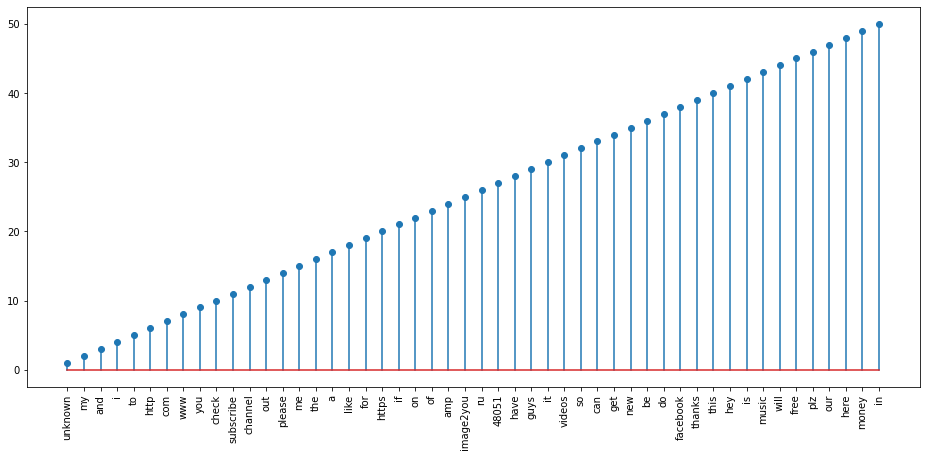

In [ ]:

x = df_true.columns
y = df_true.loc[0]
plt.figure(figsize=(16,7))
plt.xticks(rotation=90)
plt.stem(x, y)
plt.show()



Диаграмма для НЕ СПАМ сообщений (False=не СПАМ). Для нагрядности отражаю первые 50, т.к. весь словарь очень большой, теряется смысл.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


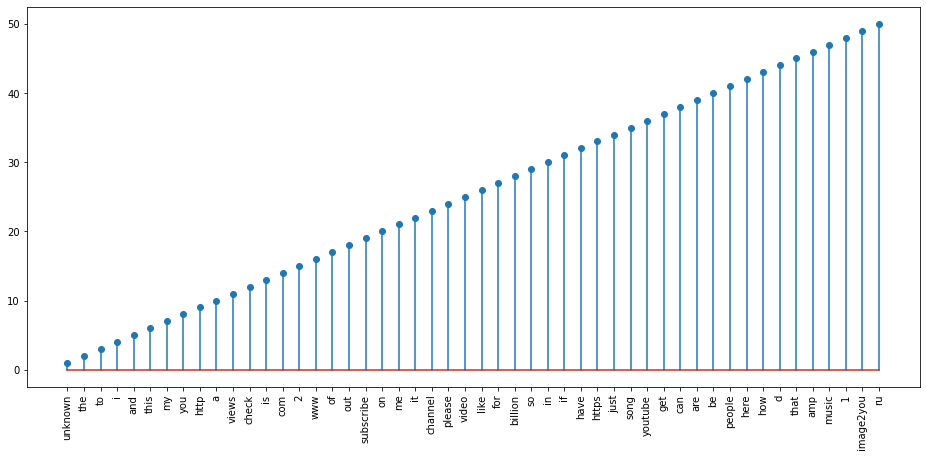

In [ ]:
x = df_false.columns
y = df_false.loc[0]
plt.figure(figsize=(16,7))
plt.xticks(rotation=90)
plt.stem(x, y)
plt.show()


# Создание нейронки + обучение + тестирование на случайной выборке

Epoch 1/20
3/3 [==============================] - 1s 91ms/step - loss: 0.6926 - accuracy: 0.5286 - val_loss: 0.6805 - val_accuracy: 0.6571
Epoch 2/20
3/3 [==============================] - 0s 23ms/step - loss: 0.6731 - accuracy: 0.6643 - val_loss: 0.6699 - val_accuracy: 0.7857
Epoch 3/20
3/3 [==============================] - 0s 21ms/step - loss: 0.6519 - accuracy: 0.8143 - val_loss: 0.6564 - val_accuracy: 0.9000
Epoch 4/20
3/3 [==============================] - 0s 18ms/step - loss: 0.6312 - accuracy: 0.8750 - val_loss: 0.6389 - val_accuracy: 0.9286
Epoch 5/20
3/3 [==============================] - 0s 18ms/step - loss: 0.6057 - accuracy: 0.9071 - val_loss: 0.6172 - val_accuracy: 0.9714
Epoch 6/20
3/3 [==============================] - 0s 19ms/step - loss: 0.5730 - accuracy: 0.9536 - val_loss: 0.5925 - val_accuracy: 0.9714
Epoch 7/20
3/3 [==============================] - 0s 20ms/step - loss: 0.5341 - accuracy: 0.9536 - val_loss: 0.5656 - val_accuracy: 0.9714
Epoch 8/20
3/3 [===========

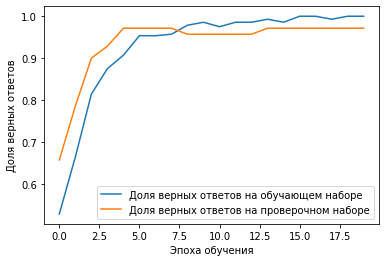

In [ ]:
#Создаём полносвязную сеть
model01 = Sequential()
#Входной полносвязный слой
model01.add(Dense(32, input_dim=maxWordsCount, activation="relu"))
#Слой регуляризации Dropout
model01.add(Dropout(0.3))

#Второй полносвязный слой
model01.add(Dense(32, activation='relu'))
#Слой регуляризации Dropout
model01.add(Dropout(0.3))

#Выходной полносвязный слой
model01.add(Dense(nClasses, activation='softmax'))


model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке
history = model01.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=128,
                    validation_data=(xVal, yVal))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model01.save('9714_2.h5')

In [ ]:
from tensorflow.keras.models import load_model
 
model01 = load_model('9714_2.h5')

In [ ]:
#Дообучаем модель, может перспектива есть
model01.compile(optimizer= Adam(0.00001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model01.history = model01.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=64,
                    validation_data=(xVal, yVal))


Epoch 1/20
5/5 [==============================] - 1s 46ms/step - loss: 0.1261 - accuracy: 1.0000 - val_loss: 0.2297 - val_accuracy: 0.9714
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1421 - accuracy: 0.9964 - val_loss: 0.2294 - val_accuracy: 0.9714
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.1251 - accuracy: 1.0000 - val_loss: 0.2291 - val_accuracy: 0.9714
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.1312 - accuracy: 1.0000 - val_loss: 0.2288 - val_accuracy: 0.9714
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1287 - accuracy: 0.9929 - val_loss: 0.2285 - val_accuracy: 0.9714
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1332 - accuracy: 1.0000 - val_loss: 0.2282 - val_accuracy: 0.9714
Epoch 7/20
5/5 [==============================] - 0s 14ms/step - loss: 0.1243 - accuracy: 0.9929 - val_loss: 0.2279 - val_accuracy: 0.9714
Epoch 8/20
5/5 [===========

In [ ]:
model01.save_weights('9714_w.h5')

In [ ]:
from tensorflow.keras.models import load_model
 
model01 = load_model('9714_2.h5')

In [ ]:
data = df[['content','class']]
data = data.sample(10)
data

# DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

,content,class
141,check men out i put allot of effort into my mu...,True
18,http://ubuntuone.com/40beUutVu2ZKxK4uTgPZ8K﻿,True
112,This song never gets old love it.﻿,False
332,"The girl in the train who was dancing, her out...",False
95,Plizz withing my channel ﻿,True
10,Hey subscribe to me﻿,True
131,PSY GOT LOTS OF MONEY FROM YOUTUBE THAT HE GO...,False
96,I made a gaming channel (Unique right?) :L Ang...,True
249,MANY MEMORIES...........﻿,False
292,Hi guys my name is Dylan and I do IRL football...,True


In [ ]:
testTexts = []
for text in data['content']:
  testTexts.append(text)
print(testTexts)


['check men out i put allot of effort into my music but unfortunatly not many  watch it\ufeff', 'http://ubuntuone.com/40beUutVu2ZKxK4uTgPZ8K\ufeff', 'This song never gets old love it.\ufeff', 'The girl in the train who was dancing, her outfit was so fucking sexy, but  the huge turn-off was she lacked eyebrows D:\ufeff', 'Plizz withing my channel \ufeff', 'Hey subscribe to me\ufeff', 'PSY GOT LOTS  OF MONEY FROM YOUTUBE THAT HE GOT FROM 2 BILLION VIEWS THIS  IS THE MOST VIEWS IN THE WORLD :D\ufeff', 'I made a gaming channel (Unique right?) :L Angry Minecraft!\ufeff', 'MANY MEMORIES...........\ufeff', 'Hi guys my name is Dylan and I do IRL football videos I have 1030  subscribers and I think you guys would like my content so come check it out  and if you do subscribe!\ufeff']


In [ ]:
for testText in testTexts:  
  testWordIndexes = tokenizer.texts_to_sequences(testText) #Обучающие тексты в индексы
  testWordIndexes = pad_sequences(testWordIndexes,maxlen=15)
  testWordIndexes01 = tokenizer.sequences_to_matrix(testWordIndexes.tolist())
  out = model01.predict([testWordIndexes01])
  if np.argmax(out[0]) == 1:
    print (testText  , 'Категория сообщения определенная нейронкой "НЕ СПАМ"',sep='\n')
    print('***')
  else:
    print (testText  , 'Категория сообщения определенная нейронкой "СПАМ"',sep='\n')
    print('***')


check men out i put allot of effort into my music but unfortunatly not many  watch it﻿
Категория сообщения определенная нейронкой "СПАМ"
***
http://ubuntuone.com/40beUutVu2ZKxK4uTgPZ8K﻿
Категория сообщения определенная нейронкой "СПАМ"
***
This song never gets old love it.﻿
Категория сообщения определенная нейронкой "НЕ СПАМ"
***
The girl in the train who was dancing, her outfit was so fucking sexy, but  the huge turn-off was she lacked eyebrows D:﻿
Категория сообщения определенная нейронкой "НЕ СПАМ"
***
Plizz withing my channel ﻿
Категория сообщения определенная нейронкой "СПАМ"
***
Hey subscribe to me﻿
Категория сообщения определенная нейронкой "СПАМ"
***
PSY GOT LOTS  OF MONEY FROM YOUTUBE THAT HE GOT FROM 2 BILLION VIEWS THIS  IS THE MOST VIEWS IN THE WORLD :D﻿
Категория сообщения определенная нейронкой "СПАМ"
***
I made a gaming channel (Unique right?) :L Angry Minecraft!﻿
Категория сообщения определенная нейронкой "СПАМ"
***
MANY MEMORIES...........﻿
Категория сообщения определе

## maxWordsCount = 5000, , создание наборов данных + обучение + тестирование на случайной выборке
Точность = 100%

In [ ]:
maxWordsCount = 5000
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#Для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
#num_words=maxWordsCount - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' - избавляемся от ненужных символов
#lower=True - приводим слова к нижнему регистру
#split=' ' - разделяем слова по пробелу
#char_level=False - просим токенайзер не удалять однобуквенные слова
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', oov_token='unknown', char_level=False)
#Подаем в обрботку наши тексты для создания словаря частотности
#Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой 
tokenizer.fit_on_texts(texts)



In [ ]:
# Формируем матрицу bag of words
xAll = tokenizer.texts_to_matrix(texts)
print(xAll.shape)
print(xAll[0,:20])

(350, 5000)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Глянем индексы слов для просмотра и размер словаря
print(tokenizer.word_index.items())
print('Размер словаря:', len(tokenizer.word_index.items()))


dict_items([('unknown', 1), ('\ufeff', 2), ('the', 3), ('to', 4), ('i', 5), ('and', 6), ('this', 7), ('my', 8), ('you', 9), ('http', 10), ('a', 11), ('check', 12), ('is', 13), ('views', 14), ('com', 15), ('2', 16), ('www', 17), ('of', 18), ('subscribe', 19), ('on', 20), ('out', 21), ('me', 22), ('it', 23), ('video', 24), ('please', 25), ('channel', 26), ('for', 27), ('like', 28), ('so', 29), ('billion', 30), ('in', 31), ('if', 32), ('have', 33), ('https', 34), ('just', 35), ('get', 36), ('can', 37), ('youtube', 38), ('song', 39), ('are', 40), ('be', 41), ('people', 42), ('here', 43), ('how', 44), ('that', 45), ('amp', 46), ('music', 47), ('1', 48), ('image2you', 49), ('ru', 50), ('48051', 51), ('not', 52), ('only', 53), ('new', 54), ('what', 55), ('we', 56), ('at', 57), ('psy', 58), ('guys', 59), ('videos', 60), ('will', 61), ('they', 62), ('there', 63), ('do', 64), ('hey', 65), ('d', 66), ('but', 67), ('facebook', 68), ('your', 69), ('money', 70), ('even', 71), ('has', 72), ('000', 73

In [ ]:
# Преобразовываем категории в векторы. Вызываем метод кодирования тестовых лейблов из библиотеки skylearn
encoder = LabelEncoder()
#Подгружаем в него категории из нашей базы
encoder.fit(classes)
#Кодируем категории
classesEncoded = encoder.transform(classes)

print(encoder.classes_)
print(classesEncoded.shape)
print(classesEncoded[:10])

[False  True]
(350,)
[1 1 1 1 1 1 1 0 1 1]


In [ ]:
# Выводим каждый лейбл в виде вектора длиной 2 с 1кой в позиции соответствующего класса. Можно было бы просто обозначить 0 = True, 1=False. 
yAll = utils.to_categorical(classesEncoded, nClasses)
print(yAll.shape)
print(yAll[0])

(350, 2)
[0. 1.]


In [ ]:
# Разбиваем все данные на обучающую и тестовую выборки с использованием метода train_test_split
xTrain, xVal, yTrain, yVal = train_test_split(xAll, yAll, test_size = 0.2, shuffle = True)
print(xTrain.shape)
print(yTrain.shape)
print(xVal.shape)
print(yVal.shape)


(280, 5000)
(280, 2)
(70, 5000)
(70, 2)


Epoch 1/20
3/3 [==============================] - 1s 83ms/step - loss: 0.7012 - accuracy: 0.5250 - val_loss: 0.6682 - val_accuracy: 0.6286
Epoch 2/20
3/3 [==============================] - 0s 19ms/step - loss: 0.6362 - accuracy: 0.7464 - val_loss: 0.6339 - val_accuracy: 0.8571
Epoch 3/20
3/3 [==============================] - 0s 16ms/step - loss: 0.5864 - accuracy: 0.8786 - val_loss: 0.5961 - val_accuracy: 0.8857
Epoch 4/20
3/3 [==============================] - 0s 15ms/step - loss: 0.5217 - accuracy: 0.9357 - val_loss: 0.5556 - val_accuracy: 0.9286
Epoch 5/20
3/3 [==============================] - 0s 17ms/step - loss: 0.4637 - accuracy: 0.9929 - val_loss: 0.5132 - val_accuracy: 0.9571
Epoch 6/20
3/3 [==============================] - 0s 16ms/step - loss: 0.4059 - accuracy: 0.9893 - val_loss: 0.4690 - val_accuracy: 0.9714
Epoch 7/20
3/3 [==============================] - 0s 18ms/step - loss: 0.3531 - accuracy: 0.9857 - val_loss: 0.4245 - val_accuracy: 0.9857
Epoch 8/20
3/3 [===========

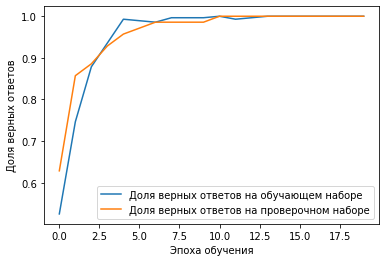

In [ ]:
#Создаём полносвязную сеть
model02 = Sequential()
#Входной полносвязный слой
model02.add(Dense(32, input_dim=maxWordsCount, activation="linear"))
#Слой регуляризации Dropout
model02.add(Dropout(0.2))
#Второй полносвязный слой
model02.add(Dense(32, activation='linear'))
#Слой регуляризации Dropout
model02.add(Dropout(0.2))
# #Третий полносвязный слой
# model01.add(Dense(100, activation='relu'))
# #Слой регуляризации Dropout
# model01.add(Dropout(0.4))
# #Выходной полносвязный слой
model02.add(Dense(nClasses, activation='softmax'))


model02.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке
history = model02.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=128,
                    validation_data=(xVal, yVal))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model02.save('100.h5')


In [ ]:
model02.save_weights('100_w.h5')

In [ ]:
from tensorflow.keras.models import load_model
 
model02 = load_model('100.h5')

In [ ]:
data = df[['content','class']]
data = data.sample(10)
data

# DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

,content,class
137,"check out ""starlitnightsky"" channel to see epi...",True
194,WAT DA FUCK THIS THE MOST VIEWED VIDEO IN YOUT...,False
132,Justin bieber = gay ﻿,False
138,https://www.tsu.co/KodysMan plz ^^﻿,True
140,http://www.gcmforex.com/partners/aw.aspx?Task=...,True
178,Please give us a chance and check out the new ...,True
190,Have you tried a new social network TSU? This ...,True
25,marketglory . com/strategygame/andrijamatf ear...,True
160,CHECK MY CHANNEL FOR MY NEW SONG 'STATIC'!! YO...,True
243,why I dont see any comments but mine?:/﻿,False


In [ ]:
testTexts = []
for text in data['content']:
  testTexts.append(text)
print(testTexts)


['check out "starlitnightsky" channel to see epic videos\ufeff', 'WAT DA FUCK THIS THE MOST VIEWED VIDEO IN YOUTUBE!\ufeff', 'Justin bieber = gay \ufeff', 'https://www.tsu.co/KodysMan plz ^^\ufeff', 'http://www.gcmforex.com/partners/aw.aspx?Task=JoinT2&amp;AffiliateID=9107\ufeff', "Please give us a chance and check out the new music video on our channel!  You won't be disappointed.\ufeff", "Have you tried a new social network TSU? This new social network has a  special thing.You can share the posts as well as on fb and twitter and even  to'll get paid You can registr here:  https://www.tsu.co/WORLDWIDE_LIFE\ufeff", 'marketglory . com/strategygame/andrijamatf earn real money from game', "CHECK MY CHANNEL FOR MY NEW SONG 'STATIC'!! YOU'LL LOVE IT!!\ufeff", 'why I dont see any comments but mine?:/\ufeff']


In [ ]:
for testText in testTexts:  
  testWordIndexes = tokenizer.texts_to_sequences(testText) #Обучающие тексты в индексы
  testWordIndexes = pad_sequences(testWordIndexes,maxlen=15)
  testWordIndexes02 = tokenizer.sequences_to_matrix(testWordIndexes.tolist())
  out = model02.predict([testWordIndexes02])
  if np.argmax(out[0]) == 1:
    print (testText  , 'Категория сообщения определенная нейронкой "НЕ СПАМ"',sep='\n')
    print('***')
  else:
    print (testText  , 'Категория сообщения определенная нейронкой "СПАМ"',sep='\n')
    print('***')


check out "starlitnightsky" channel to see epic videos﻿
Категория сообщения определенная нейронкой "СПАМ"
***
WAT DA FUCK THIS THE MOST VIEWED VIDEO IN YOUTUBE!﻿
Категория сообщения определенная нейронкой "СПАМ"
***
Justin bieber = gay ﻿
Категория сообщения определенная нейронкой "СПАМ"
***
https://www.tsu.co/KodysMan plz ^^﻿
Категория сообщения определенная нейронкой "СПАМ"
***
http://www.gcmforex.com/partners/aw.aspx?Task=JoinT2&amp;AffiliateID=9107﻿
Категория сообщения определенная нейронкой "СПАМ"
***
Please give us a chance and check out the new music video on our channel!  You won't be disappointed.﻿
Категория сообщения определенная нейронкой "СПАМ"
***
Have you tried a new social network TSU? This new social network has a  special thing.You can share the posts as well as on fb and twitter and even  to'll get paid You can registr here:  https://www.tsu.co/WORLDWIDE_LIFE﻿
Категория сообщения определенная нейронкой "СПАМ"
***
marketglory . com/strategygame/andrijamatf earn real mon

# Выводы. 

Я отметила , что база очень маленькая, нейронка запомнила данные, буду благодарна за рекомендации. Повышала Dropout, экспериментировала с maxWordCount, слоями и количеством нейронов - не помогло.